In [1]:
# install packages/libraries
!conda install xlwt -y
!conda install -c conda-forge tqdm -y
!conda install openpyxl -y
!conda install -c conda-forge ipympl

- Collecting package metadata (current_repodata.json): - ^C
failed

CondaError: KeyboardInterrupt

^C

CondaError: KeyboardInterrupt

^C

CondaError: KeyboardInterrupt


# Global Variables

Haven't implemented timeouts yet. 

If one method has 2 time outs and the other has 20 timeouts, they are the same

In [1]:
# Adjust penalty weight
# penalty weight not included 
penalty_weight = 10  # seconds
excel_file_path = 'test.xlsx'

# Read time from files into dataframe

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import glob
from pandas import ExcelWriter

In [2]:
%matplotlib notebook

In [3]:
# from displayfunction import display

# install openyxl
# install xlwt


def useless_function():
    """
    :return: A dictionary mapping the file-name to it's corresponding average time
    """
    conditions = []
    ave_time = []
    dct = {}
    for file in glob.glob("time-record/*.txt"):
        with open(file, 'r') as f:
            a = f.read().split('\n')[:-1]  # strip the last whitespace
            # ['36.175875663757324,1', '36.49494504928589,1']
            a = np.average([float(ele.split(',')[0]) + int(ele.split(',')[1]) * penalty_weight for ele in a])
            print(a)
            conditions.append(f.name.replace('time-record/', '').replace('.txt', ''))
            ave_time.append(a)
            dct[f.name.replace('time-record/', '').replace('.txt', '')] = a


def create_table():
    """
    Creates a table containing the average time of each constraint
    :return: the table: 2D list
    """
    table = [[b1, b2, b3, b4, b5] for b1 in (True, False)
             for b2 in (True, False)
             for b3 in (True, False)
             for b4 in (True, False) if not (b2 and b4)
             for b5 in (True, False)]

    for ele in table:
        b1, b2, b3, b4, b5 = ele
        for suffix in ['full_time.txt', 'holes_time.txt']:
            s = ['argyle-', 'classic-'][b1] + ['PbEq-', 'distinct-'][b2] + ['inorder-', 'percol-'][b3] \
                + ['is_num-', 'is_bool-'][b4] + ['no_prefill-', 'prefill-'][b5] + suffix
            try:
                with open('time-record/' + s) as f:
                    lines = f.read().split('\n')[:-1]  # strip the last whitespace
            except FileNotFoundError:
                lines = []
            # ['36.175875663757324,1', '36.49494504928589,1']
            data = [line.split(',') for line in lines]
            runtimes = [float(datum[0]) for datum in data]
            timeouts = [int(datum[1]) for datum in data]
            average_time = np.average(runtimes)
            num_rows = len(data)
            # percentage of timeouts:
            timeout_perc = np.average([(0 if timeout == 0 else 1) for timeout in timeouts])
            # average timeout
            timeout_avg = np.average([timeout for timeout in timeouts if timeout != 0])

            yield [b1, b2, b3, b4, b5, suffix == 'full_time.txt',
                   average_time, num_rows, timeout_perc, timeout_avg]
    # *** Would this matter? 
    return table


table = create_table()
# export to excel
df = pd.DataFrame(table, columns=['classic', 'distinct', 'per_col', 'no_num', 'prefill', 'generating full grid',
                                  'average time', 'number of rows', 'percentage with any timeouts', 'avg nr of timeouts'])
time_rec = df['average time']
solve_time = np.array(time_rec[::2])
gen_time = np.array(time_rec[1::2])
assert len(solve_time) == len(gen_time), "some full/holes sudokus are missing"
df['full/holes ratio'] = [None if i % 2 == 0 else solve_time[i//2]/gen_time[i//2] for i in range(len(time_rec))]

/Users/jiazhenghao/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/jiazhenghao/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# display(full_false[full_false['average time_distinct']<=full_false['average time_pbeq']])

In [9]:
df

,classic,distinct,per_col,no_num,prefill,generating full grid,average time,number of rows,percentage with any timeouts,avg nr of timeouts,full/holes ratio
0,True,True,True,False,True,True,4.503707,91,0.000000,NaN,NaN
1,True,True,True,False,True,False,1.299504,40,0.000000,NaN,3.465713
2,True,True,True,False,False,True,31.359815,90,1.000000,3.288889,NaN
3,True,True,True,False,False,False,1.295239,40,0.000000,NaN,24.211600
4,True,True,False,False,True,True,2.831111,90,0.077778,2.428571,NaN
5,True,True,False,False,True,False,5.250797,40,0.425000,1.882353,0.539177
6,True,True,False,False,False,True,71.400253,90,1.000000,9.611111,NaN
7,True,True,False,False,False,False,1.292166,40,0.000000,NaN,55.256273
8,True,False,True,True,True,True,0.052104,90,0.000000,NaN,NaN
9,True,False,True,True,True,False,3.192284,40,0.000000,NaN,0.016322


# Plot df grouped by different comparisons 

In [12]:
import ast
def parse_line_to_dict(line):
    # Convert string to dictionary safely
    return ast.literal_eval(line.strip())
    
def process_data(file_path):
    processed_data = []

    with open(file_path, 'r') as file:
        for line in file:
            data_dict = parse_line_to_dict(line)
            problem_data = data_dict['problem']

            for constraint, solver_data in data_dict.items():
                if constraint != 'problem':
                    row = {'grid': problem_data['grid'], 'constraint': constraint}

                    for solver, details in solver_data.items():
                        # Skip the smt_path key
                        if solver == 'smt_path':
                            continue

                        # Check if details is a list and has the expected structure
                        if isinstance(details, list) and len(details) > 0 and len(details[0]) > 1:
                            row[f'{solver}_time'] = details[0][0]  # time
                            row[f'{solver}_timeout'] = details[0][1]  # timeout status
                        else:
                            print(f"Unexpected format for details: {details}")
                    
                    processed_data.append(row)
    
    return pd.DataFrame(processed_data)

# Read and process data from file
file_path = 'Sudoku/hard_sudoku_instance-logFile/classic_time.txt'
df = process_data(file_path)

In [88]:
df

,grid,constraint,z3_time,z3_timeout,cvc5_time,cvc5_timeout,config_id,problem
0,0000000000000000000000000000000000000000000000...,"(True, True, True, False, True)",5.005965,True,5.005320,True,0000000000000000000000000000000000000000000000...,True_True_False_True
1,0000000000000000000000000000000000000000000000...,"(True, True, True, False, False)",5.004754,True,5.004764,True,0000000000000000000000000000000000000000000000...,True_True_False_False
2,0000000000000000000000000000000000000000000000...,"(True, True, False, False, True)",5.004394,True,5.004283,True,0000000000000000000000000000000000000000000000...,True_False_False_True
3,0000000000000000000000000000000000000000000000...,"(True, True, False, False, False)",5.004895,True,5.005181,True,0000000000000000000000000000000000000000000000...,True_False_False_False
4,0000000000000000000000000000000000000000000000...,"(True, False, True, True, True)",0.031069,False,0.005850,False,0000000000000000000000000000000000000000000000...,True_True_True_True
...,...,...,...,...,...,...,...,...
295,0000000010000010000100000000000001000001000001...,"(True, False, True, False, False)",0.032179,False,0.005020,False,0000000010000010000100000000000001000001000001...,True_True_False_False
296,0000000010000010000100000000000001000001000001...,"(True, False, False, True, True)",0.023707,False,0.005222,False,0000000010000010000100000000000001000001000001...,True_False_True_True
297,0000000010000010000100000000000001000001000001...,"(True, False, False, True, False)",0.025378,False,0.005354,False,0000000010000010000100000000000001000001000001...,True_False_True_False
298,0000000010000010000100000000000001000001000001...,"(True, False, False, False, True)",0.033459,False,0.005113,False,0000000010000010000100000000000001000001000001...,True_False_False_True


In [73]:
df_true

,grid,constraint,z3_time,z3_timeout,cvc5_time,cvc5_timeout,config_id
0,0000000000000000000000000000000000000000000000...,"(True, True, True, False, True)",5.005965,True,5.005320,True,0000000000000000000000000000000000000000000000...
1,0000000000000000000000000000000000000000000000...,"(True, True, True, False, False)",5.004754,True,5.004764,True,0000000000000000000000000000000000000000000000...
2,0000000000000000000000000000000000000000000000...,"(True, True, False, False, True)",5.004394,True,5.004283,True,0000000000000000000000000000000000000000000000...
3,0000000000000000000000000000000000000000000000...,"(True, True, False, False, False)",5.004895,True,5.005181,True,0000000000000000000000000000000000000000000000...
12,0000000000000000000000000000000000000000000000...,"(True, True, True, False, True)",5.014455,True,5.004990,True,0000000000000000000000000000000000000000000000...
...,...,...,...,...,...,...,...
279,0000000010000010000100000000000001000001000001...,"(True, True, False, False, False)",5.004329,True,5.005210,True,0000000010000010000100000000000001000001000001...
288,0000000010000010000100000000000001000001000001...,"(True, True, True, False, True)",5.004623,True,5.005493,True,0000000010000010000100000000000001000001000001...
289,0000000010000010000100000000000001000001000001...,"(True, True, True, False, False)",5.004599,True,5.005082,True,0000000010000010000100000000000001000001000001...
290,0000000010000010000100000000000001000001000001...,"(True, True, False, False, True)",5.004736,True,5.005067,True,0000000010000010000100000000000001000001000001...


In [69]:
df.iloc[(i for i in range(len(df)) if df.iloc[i]['constraint'][1])]

,grid,constraint,z3_time,z3_timeout,cvc5_time,cvc5_timeout,config_id
0,0000000000000000000000000000000000000000000000...,"(True, True, True, False, True)",5.005965,True,5.005320,True,0000000000000000000000000000000000000000000000...
1,0000000000000000000000000000000000000000000000...,"(True, True, True, False, False)",5.004754,True,5.004764,True,0000000000000000000000000000000000000000000000...
2,0000000000000000000000000000000000000000000000...,"(True, True, False, False, True)",5.004394,True,5.004283,True,0000000000000000000000000000000000000000000000...
3,0000000000000000000000000000000000000000000000...,"(True, True, False, False, False)",5.004895,True,5.005181,True,0000000000000000000000000000000000000000000000...
12,0000000000000000000000000000000000000000000000...,"(True, True, True, False, True)",5.014455,True,5.004990,True,0000000000000000000000000000000000000000000000...
...,...,...,...,...,...,...,...
279,0000000010000010000100000000000001000001000001...,"(True, True, False, False, False)",5.004329,True,5.005210,True,0000000010000010000100000000000001000001000001...
288,0000000010000010000100000000000001000001000001...,"(True, True, True, False, True)",5.004623,True,5.005493,True,0000000010000010000100000000000001000001000001...
289,0000000010000010000100000000000001000001000001...,"(True, True, True, False, False)",5.004599,True,5.005082,True,0000000010000010000100000000000001000001000001...
290,0000000010000010000100000000000001000001000001...,"(True, True, False, False, True)",5.004736,True,5.005067,True,0000000010000010000100000000000001000001000001...


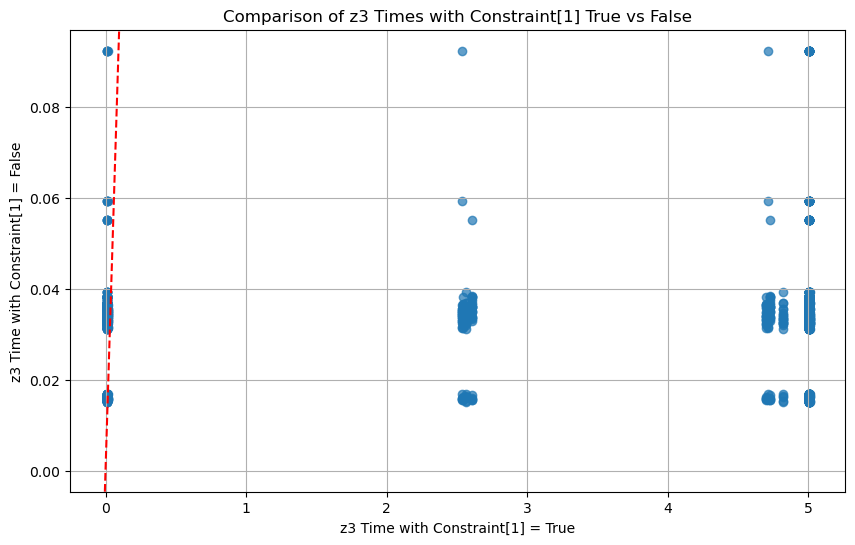

In [87]:
def plot_constraints_comparison(df, option_index, solver):
    def create_identifier(row, df_columns, single_condition):
        excluded_cols = ['average time', 
                         'number of rows', 'percentage with any timeouts', 
                         'avg nr of timeouts', 'full/holes ratio', single_condition]
        values = []
        for col in df_columns:
            if col not in excluded_cols:
                values.append(str(row[col]))
        return '_'.join([str(row['constraint'][i]) for i in range(5) if not i == single_condition])
    # Ensure solvers is a list
    solvers = [solver] if isinstance(solver, str) else solver

    df['problem'] = df.apply(lambda row: create_identifier(row,df.columns,option_index), axis=1)
    # Create two subsets of the DataFrame based on the value at the specified index in the constraint tuple
    df_true = df.iloc[(i for i in range(len(df)) if df.iloc[i]['constraint'][option_index])]
    df_false = df.iloc[(i for i in range(len(df)) if not df.iloc[i]['constraint'][option_index])]
    

    # Merge the two subsets on the 'problem' field
    merged_df = pd.merge(df_true, df_false, on='problem', suffixes=('_true', '_false'))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_df[f'{solver}_time_true'], merged_df[f'{solver}_time_false'], alpha=0.7)
    plt.title(f'Comparison of {solver} Times with Constraint[{option_index}] True vs False')
    plt.xlabel(f'{solver} Time with Constraint[{option_index}] = True')
    plt.ylabel(f'{solver} Time with Constraint[{option_index}] = False')
    plt.grid(True)
    plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Line y=x for reference
    plt.show()

# Example usage
plot_constraints_comparison(df, 1, "z3")

In [11]:
plot_constraints_comparison(df,1,"z3")

TypeError: can only concatenate list (not "str") to list

### Function for plotting time according comparing single condisions

In [12]:
def plot_condition_comparison(df,single_condition):
    # single_condition = 'distinct'
    def create_identifier(row, df_columns, single_condition):
        excluded_cols = ['average time', 
                         'number of rows', 'percentage with any timeouts', 
                         'avg nr of timeouts', 'full/holes ratio', single_condition]
        values = []
        for col in df_columns:
            if col not in excluded_cols:
                values.append(str(row[col]))
        return '_'.join(values)
    
    
    
    df['config_id'] = df.apply(lambda row: create_identifier(row,df.columns,single_condition), axis=1)
    true_times = df[df[single_condition] == True]
    false_times = df[df[single_condition] == False]
    
    # merge dataframe so same conditions (except for single_condition) appears on the same row
    merged_times = pd.merge(true_times, false_times, on='config_id', suffixes=('_'+single_condition, '_not_'+single_condition))
    # Create a new figure with 1 row and 2 columns of subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as per your requirement
    # Extract rows where 'generating full grid' is True and False respectively for distinct and pbeq
    full_true = merged_times[(merged_times['generating full grid_'+single_condition] == True) & (merged_times['generating full grid_not_'+single_condition] == True)]
    full_false = merged_times[(merged_times['generating full grid_'+single_condition] == False) & (merged_times['generating full grid_not_'+single_condition] == False)]
    
    # Subplot 1: Generating Full Grid
    axs[0].scatter(full_true['average time_'+single_condition], full_true['average time_not_'+single_condition], alpha=0.5)
    axs[0].set_title('Generating Full Grid')
    axs[0].set_xlabel(f'Time using {single_condition}')
    axs[0].set_ylabel(f'Time using not {single_condition}')
    axs[0].grid(True)
    min_val_0 = min(min(full_true['average time_'+single_condition]), min(full_true['average time_not_'+single_condition]))
    max_val_0 = max(max(full_true['average time_'+single_condition]), max(full_true['average time_not_'+single_condition]))
    axs[0].plot([min_val_0, max_val_0], [min_val_0, max_val_0], color='red', linestyle='--', lw=2)
    
    # Subplot 2: Not Generating Full Grid
    axs[1].scatter(full_false['average time_'+single_condition], full_false['average time_not_'+single_condition], alpha=0.5, color='green')
    axs[1].set_title('Generating Grid With Holes')
    axs[1].set_xlabel(f'Time using {single_condition}')
    axs[1].set_ylabel(f'Time using not {single_condition}')
    axs[1].grid(True)
    min_val_1 = min(min(full_false['average time_'+single_condition]), min(full_false['average time_not_'+single_condition]))
    max_val_1 = max(max(full_false['average time_'+single_condition]), max(full_false['average time_not_'+single_condition]))
    axs[1].plot([min_val_1, max_val_1], [min_val_1, max_val_1], color='red', linestyle='--', lw=2)
    
    # Adjust spacing between subplots
    plt.tight_layout(pad=4.0)
    
    # Display the plots
    plt.show()


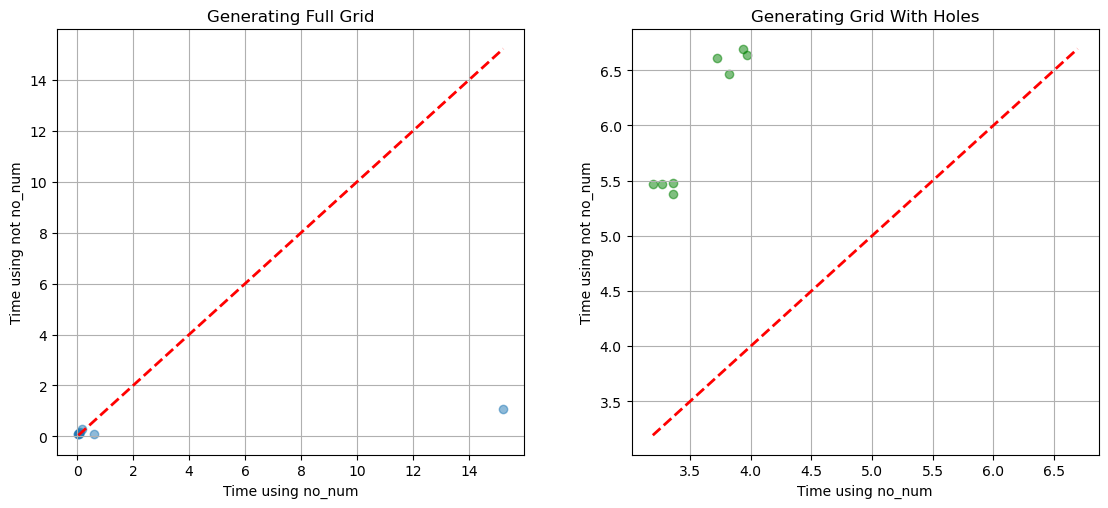

,classic,distinct,per_col,no_num,prefill,generating full grid,average time,number of rows,percentage with any timeouts,avg nr of timeouts,full/holes ratio,config_id
0,True,True,True,False,True,True,4.503707,91,0.000000,NaN,NaN,True_True_True_True_True
1,True,True,True,False,True,False,1.299504,40,0.000000,NaN,3.465713,True_True_True_True_False
2,True,True,True,False,False,True,31.359815,90,1.000000,3.288889,NaN,True_True_True_False_True
3,True,True,True,False,False,False,1.295239,40,0.000000,NaN,24.211600,True_True_True_False_False
4,True,True,False,False,True,True,2.831111,90,0.077778,2.428571,NaN,True_True_False_True_True
5,True,True,False,False,True,False,5.250797,40,0.425000,1.882353,0.539177,True_True_False_True_False
6,True,True,False,False,False,True,71.400253,90,1.000000,9.611111,NaN,True_True_False_False_True
7,True,True,False,False,False,False,1.292166,40,0.000000,NaN,55.256273,True_True_False_False_False
8,True,False,True,True,True,True,0.052104,90,0.000000,NaN,NaN,True_False_True_True_True
9,True,False,True,True,True,False,3.192284,40,0.000000,NaN,0.016322,True_False_True_True_False


In [11]:
# avaiable options: 
"""
['classic', 'distinct', 'per_col', 'no_num', 'prefill']
"""
options = ['classic', 'distinct', 'per_col', 'no_num', 'prefill']
# *** somehow I have to pass in the copy??
plot_condition_comparison(df.copy(),options[3])

ValueError: min() arg is an empty sequence

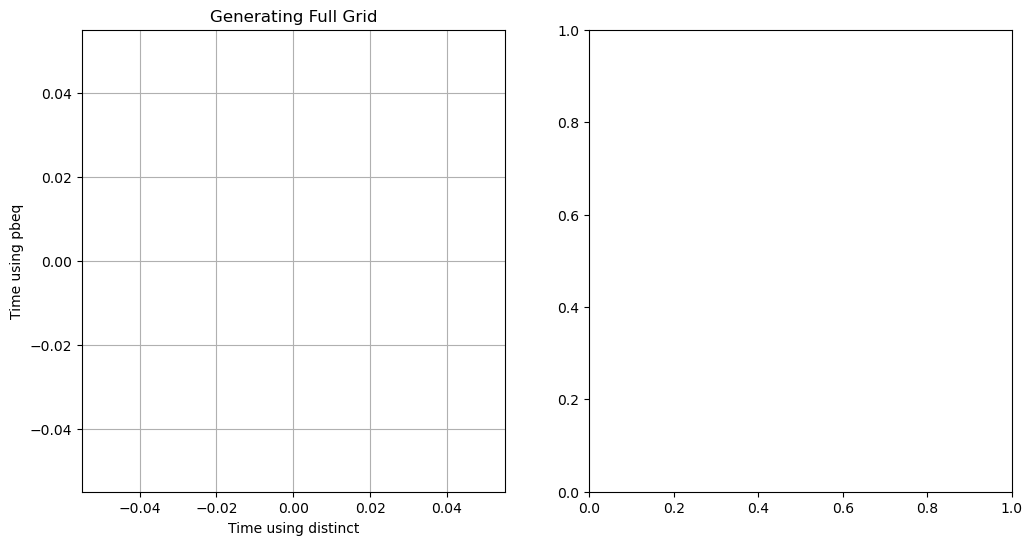

In [52]:
def create_identifier(row):
    # exclude the columns that should not be part of the identifier
    # you might need to adjust this list
    excluded_cols = ['average time', 
                     'number of rows', 'percentage with any timeouts', 
                     'avg nr of timeouts', 'full/holes ratio']+['distinct']
    values = []
    for col in df.columns:
        if col not in excluded_cols:
            values.append(str(row[col]))
    return '_'.join(values)

# Create separate DataFrames for distinct and pbeq timings
df.drop(['config_id'],axis=1)
df['config_id'] = df.apply(create_identifier, axis=1)
distinct_times = df[df['distinct'] == True]
pbeq_times = df[df['distinct'] == False]

# Merge the DataFrames on the config_id to ensure that pairs are matched
merged_times = pd.merge(distinct_times, pbeq_times, on='config_id', suffixes=('_distinct', '_pbeq'))

# Create a new figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as per your requirement

# Extract rows where 'generating full grid' is True and False respectively for distinct and pbeq
full_true = merged_times[(merged_times['generating full grid_distinct'] == True) & (merged_times['generating full grid_pbeq'] == True)]
full_false = merged_times[(merged_times['generating full grid_distinct'] == False) & (merged_times['generating full grid_pbeq'] == False)]

# Subplot 1: Generating Full Grid
axs[0].scatter(full_true['average time_distinct'], full_true['average time_pbeq'], alpha=0.5)
axs[0].set_title('Generating Full Grid')
axs[0].set_xlabel('Time using distinct')
axs[0].set_ylabel('Time using pbeq')
axs[0].grid(True)
min_val_0 = min(min(full_true['average time_distinct']), min(full_true['average time_pbeq']))
max_val_0 = max(max(full_true['average time_distinct']), max(full_true['average time_pbeq']))
axs[0].plot([min_val_0, max_val_0], [min_val_0, max_val_0], color='red', linestyle='--', lw=2)

# Subplot 2: Not Generating Full Grid
axs[1].scatter(full_false['average time_distinct'], full_false['average time_pbeq'], alpha=0.5, color='green')
axs[1].set_title('Generating Grid With Holes')
axs[1].set_xlabel('Time using distinct')
axs[1].set_ylabel('Time using pbeq')
axs[1].grid(True)
min_val_1 = min(min(full_false['average time_distinct']), min(full_false['average time_pbeq']))
max_val_1 = max(max(full_false['average time_distinct']), max(full_false['average time_pbeq']))
axs[1].plot([min_val_1, max_val_1], [min_val_1, max_val_1], color='red', linestyle='--', lw=2)

# Adjust spacing between subplots
plt.tight_layout(pad=4.0)

# Display the plots
plt.show()


In [61]:
print("Sample config_ids from true_times:", true_times['config_id'].sample(5).values)
print("Sample config_ids from false_times:", false_times['config_id'].sample(5).values)


Sample config_ids from true_times: ['True_False_True_True_False' 'True_True_False_True_True'
 'False_True_False_False_False' 'True_False_False_False_True'
 'True_True_False_False_True']
Sample config_ids from false_times: ['False_False_True_True_False' 'False_False_True_True_True'
 'False_True_False_True_False' 'False_False_True_False_True'
 'False_False_False_True_False']


In [75]:
df.columns

Index(['classic', 'distinct', 'per_col', 'no_num', 'prefill',
       'generating full grid', 'average time', 'number of rows',
       'percentage with any timeouts', 'avg nr of timeouts',
       'full/holes ratio'],
      dtype='object')

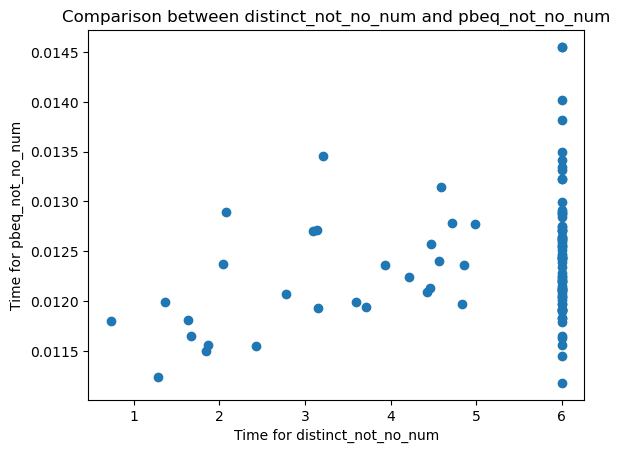

In [17]:
# Read the file and store dictionaries in a list
file_path = "Sudoku/sudoku-logFile/classic_time.txt"
data_dicts = []
with open(file_path, "r") as f:
    for line in f.readlines():
        data_dicts.append(eval(line.strip()))

# Initialize lists for plotting
distinct_not_no_num =[] 
pbeq_not_no_num = [] 
pbeq_no_num = [] 

# Filter data and prepare for plotting
for data_dict in data_dicts:
    for constraint, value in data_dict.items():
        if constraint == 'problem':  # Skip the 'problem' key
            continue
        
        # If we reached this point, 'value' should be (time, did_timeout)
        time, did_timeout = value
        classic, distinct, per_col, no_num, prefill = eval(constraint)
        
        # Handle timeout cases
        if did_timeout:
            time = 6.0  # Set time to 6 seconds for timeouts
            
        if classic and distinct and not no_num:
            distinct_not_no_num.append(time)
        elif classic and not distinct and not no_num:
            pbeq_not_no_num.append(time)
        elif classic and not distinct and no_num:
            pbeq_no_num.append(time)


        # Repeat for y values if needed.

# Plot for distinct_not_no_num vs pbeq_not_no_num
plt.scatter(distinct_not_no_num, pbeq_not_no_num)
plt.xlabel("Time for distinct_not_no_num")
plt.ylabel("Time for pbeq_not_no_num")
plt.title("Comparison between distinct_not_no_num and pbeq_not_no_num")
plt.show()

# You can repeat similar plotting for the other conditions


In [16]:
print(len(distinct_not_no_num_x))
print(len(pbeq_not_no_num_y), len(pbeq_no_num_x), len(pbeq_no_num_y))


100
100 100 100
True


In [34]:
display(data_dicts[0])

{'problem': '000000000000000000000000000000000000000000000000000000000000000000000000000000000\t(True, True, True, False, False)\t(0, 0)\t9\tsat\n',
 '[True, True, True, False, True]': (5.005126953125, 1),
 '[True, True, True, False, False]': (5.005105972290039, 1),
 '[True, True, False, False, True]': (5.003572940826416, 1),
 '[True, True, False, False, False]': (5.003093004226685, 1),
 '[True, False, True, True, True]': (0.005852937698364258, 0),
 '[True, False, True, True, False]': (0.005674839019775391, 0),
 '[True, False, True, False, True]': (0.011654138565063477, 0),
 '[True, False, True, False, False]': (0.011917829513549805, 0),
 '[True, False, False, True, True]': (0.0057070255279541016, 0),
 '[True, False, False, True, False]': (0.005797147750854492, 0),
 '[True, False, False, False, True]': (0.011561870574951172, 0),
 '[True, False, False, False, False]': (0.012421131134033203, 0)}

In [39]:
for constraint, value in data_dicts[0].items():
        if constraint == 'problem':  # Skip the 'problem' key
            continue
        
        # If we reached this point, 'value' should be (time, did_timeout)
        time, did_timeout = value
        classic, distinct, per_col, no_num, prefill = eval(constraint)
        
        # Handle timeout cases
        if did_timeout:
            time = 6.0  # Set time to 6 seconds for timeouts
            
        if classic and distinct and not no_num:
            print(f'classic,distinct,no_num')
        elif classic and not distinct and not no_num:
            print('classic,not distinct,not no_num')
            print(time,did_timeout)
        elif classic and not distinct and no_num:
            print('classic,not distinct, no_num')

classic,distinct,no_num
classic,distinct,no_num
classic,distinct,no_num
classic,distinct,no_num
classic,not distinct, no_num
classic,not distinct, no_num
classic,not distinct,not no_num
0.011654138565063477 0
classic,not distinct,not no_num
0.011917829513549805 0
classic,not distinct, no_num
classic,not distinct, no_num
classic,not distinct,not no_num
0.011561870574951172 0
classic,not distinct,not no_num
0.012421131134033203 0


In [9]:
data_dicts

[{'problem': '000000000000000000000000000000000000000000000000000000000000000000000000000000000\t(True, True, True, False, False)\t(0, 0)\t9\tsat\n',
  '[True, True, True, False, True]': (5.005126953125, 1),
  '[True, True, True, False, False]': (5.005105972290039, 1),
  '[True, True, False, False, True]': (5.003572940826416, 1),
  '[True, True, False, False, False]': (5.003093004226685, 1),
  '[True, False, True, True, True]': (0.005852937698364258, 0),
  '[True, False, True, True, False]': (0.005674839019775391, 0),
  '[True, False, True, False, True]': (0.011654138565063477, 0),
  '[True, False, True, False, False]': (0.011917829513549805, 0),
  '[True, False, False, True, True]': (0.0057070255279541016, 0),
  '[True, False, False, True, False]': (0.005797147750854492, 0),
  '[True, False, False, False, True]': (0.011561870574951172, 0),
  '[True, False, False, False, False]': (0.012421131134033203, 0)},
 {'problem': '90000000000000000000000000000000000000000000000000000000000000000

In [ ]:
 sort classic.txt | uniq > classic2.txt